## assignment seo

### SEO Data Columns

- **keyword** → Search term people use on Google  
- **country** → Location where the keyword is searched  
- **avg_position** → Avg. ranking of your page for the keyword  
- **clicks** → Number of times users clicked your site’s link  
- **impressions** → Times your site appeared in search results  
- **page** → URL shown when people search the keyword  
- **competitor_position** → Avg. ranking of competitor’s page for same keyword  
- **search_volume** → Estimated monthly searches for the keyword  
- **ctr (Click-Through Rate)** → % of impressions that resulted in clicks  
  - Formula: `CTR = (Clicks / Impressions) * 100`

## Problem Statement

Your mission is to **analyze SEO data and translate the insights into business recommendations that drive measurable results**.  

Using the provided dataset, you need to accomplish the following:

---

### 1. Analyze Current SEO Performance
- Identify which keywords perform the best.
- Determine which markets (FR, EN, IT, BR) show the strongest potential.

### 2. Identify SEO Growth Opportunities
- Find keywords with **high search volume** but an **average position greater than 5**.
- Highlight cases where competitors are ranking higher than your site.

### 3. Provide Actionable Business Recommendations
- Prioritize improvements (e.g., content, technical fixes, backlinks).
- Suggest new keywords or clusters to target for growth.

---

### Expected Deliverable
A **short report (2–3 pages or slides)** that includes:
- Methodology
- Key visualizations (charts, tables, etc.)
- Key insights
- Clear, prioritized business recommendations

---

### Optional
You may propose a simple estimation or model showing the **impact of ranking improvements** (e.g., moving from position 8 to 3) on organic traffic.  
The focus should remain on **reasoning and business understanding**.

#### 1.importing liabraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp
import plotly.figure_factory as ff


#### 2.reading the dataset

In [2]:
df = pd.read_csv(r"../data/big-sports.csv")

In [3]:
df.head(5)

,keyword,country,avg_position,clicks,impressions,page,competitor_position,search_volume,ctr
0,F1 results,IT,18.5,4093,4477,https://bigsports.news/EN/tennis-live-score,1.9,30577,0.9142
1,UFC fights,FR,11.3,448,31325,https://bigsports.news/IT/golf-leaderboard,21.5,53213,0.0143
2,NBA playoffs,FR,27.0,4462,28777,https://bigsports.news/BR/cricket-live-updates,4.1,64644,0.1551
3,tennis live score,BR,18.0,4158,30757,https://bigsports.news/BR/tennis-live-score,20.0,15698,0.1352
4,La Liga standings,EN,29.1,832,30391,https://bigsports.news/FR/F1-results,26.3,16255,0.0274


In [4]:
df.columns.tolist()

['keyword',
 'country',
 'avg_position',
 'clicks',
 'impressions',
 'page',
 'competitor_position',
 'search_volume',
 'ctr']

In [5]:

df.describe()


,avg_position,clicks,impressions,competitor_position,search_volume,ctr
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,15.172000,2540.440000,24277.600000,16.999000,46831.620000,0.374428
std,9.077245,1504.765483,13844.437008,8.818833,28348.446643,1.637257
min,1.300000,106.000000,213.000000,1.000000,1588.000000,0.003400
25%,6.200000,1112.500000,14579.250000,9.575000,22697.250000,0.058975
50%,15.600000,2789.500000,24476.500000,18.300000,44771.500000,0.096350
75%,23.375000,3878.750000,37424.500000,25.400000,68410.000000,0.213375
max,29.300000,4979.000000,49958.000000,30.000000,97112.000000,16.164300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   keyword              100 non-null    object 
 1   country              100 non-null    object 
 2   avg_position         100 non-null    float64
 3   clicks               100 non-null    int64  
 4   impressions          100 non-null    int64  
 5   page                 100 non-null    object 
 6   competitor_position  100 non-null    float64
 7   search_volume        100 non-null    int64  
 8   ctr                  100 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.2+ KB


In [7]:
df.shape


(100, 9)

#### 3.finding the unique values and its counts in all columns

In [8]:
for col in df.columns:
    print(f"Value counts for {col}:{df[col].value_counts()}")

Value counts for keyword:keyword
MMA results             8
CSGO odds               7
La Liga standings       7
horse racing odds       7
NFL highlights          6
Serie A fixtures        5
tennis live score       5
rugby scores            5
World Cup 2026          5
sports predictions      4
betting regulations     4
sports analytics        4
UFC fights              4
golf leaderboard        4
betting bonuses         4
best bookmakers         4
cricket live updates    3
betting tips            3
Valorant rankings       2
F1 results              2
eSports tournaments     2
NBA playoffs            2
Premier League odds     1
Champions League        1
football news           1
Name: count, dtype: int64
Value counts for country:country
EN    32
IT    27
BR    22
FR    19
Name: count, dtype: int64
Value counts for avg_position:avg_position
19.1    3
14.5    2
1.6     2
5.2     2
28.7    2
       ..
19.6    1
11.5    1
18.6    1
5.6     1
3.7     1
Name: count, Length: 85, dtype: int64
Value

In [9]:
df.nunique()

keyword                 25
country                  4
avg_position            85
clicks                 100
impressions             99
page                    63
competitor_position     82
search_volume          100
ctr                     98
dtype: int64

#### 4.removing the whitespaces in colum names if present 

In [10]:
df.columns=[c.strip() for c in df.columns]

#### 5.converting to lower and replacing spce with _

In [11]:
df = df.rename(columns={c: c.lower().replace(' ','_') for c in df.columns})


#### 6. making sure all the values in numeric are numeric and changing them to numeric

In [12]:
for col in ['search_volume','avg_position','clicks','impressions','ctr','competitor_position']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

#### 7.checking for dublicated

In [13]:
df.duplicated().sum()

0

#### 8.checking for null values

In [14]:
df.isna().sum()

keyword                0
country                0
avg_position           0
clicks                 0
impressions            0
page                   0
competitor_position    0
search_volume          0
ctr                    0
dtype: int64

##### 9.these are all the repeated values but they are all unique like mma resulyts for en and fr both diffferntent

In [15]:
for c in df.columns :
    print(f"duplicated values in {c}:{df.duplicated(subset=[c]).sum()}")


duplicated values in keyword:75
duplicated values in country:96
duplicated values in avg_position:15
duplicated values in clicks:0
duplicated values in impressions:1
duplicated values in page:37
duplicated values in competitor_position:18
duplicated values in search_volume:0
duplicated values in ctr:2



### 1. Analyze Current SEO Performance
- Identify which keywords perform the best.
- Determine which markets (FR, EN, IT, BR) show the strongest potential.



##### a. based on clicks 

In [16]:

keyword_summary = df.groupby('keyword', as_index=False).agg({
    'clicks': 'sum',
    'impressions': 'sum',
    'ctr': 'mean'   
})

top_clicks = keyword_summary.sort_values('clicks', ascending=False).head(10)
top_impressions=keyword_summary.sort_values('impressions',ascending=False).head(10)
top_ctr=keyword_summary.sort_values('ctr',ascending=False).head(10)
top_clicks


,keyword,clicks,impressions,ctr
4,MMA results,22750,232338,0.234000
6,NFL highlights,19665,122946,2.847100
3,La Liga standings,18949,206144,0.131329
11,World Cup 2026,15489,132502,0.440640
20,horse racing odds,14599,150789,0.170900
8,Serie A fixtures,14584,107033,0.168080
24,tennis live score,14572,135608,0.133760
21,rugby scores,13043,74250,0.694220
14,betting regulations,12702,112813,0.160625
19,golf leaderboard,12028,95433,0.158550


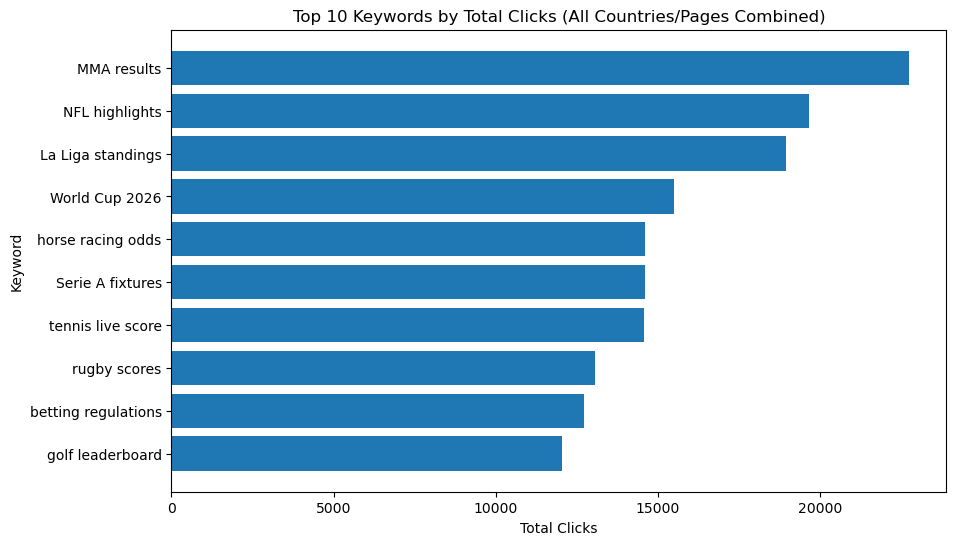

In [17]:

plt.figure(figsize=(10,6))
plt.barh(top_clicks['keyword'], top_clicks['clicks'].sort_values(ascending=False))
plt.xlabel('Total Clicks')
plt.ylabel('Keyword')
plt.title('Top 10 Keywords by Total Clicks (All Countries/Pages Combined)')
plt.gca().invert_yaxis()
plt.show()


##### b.based on impressions

In [18]:
top_impressions

,keyword,clicks,impressions,ctr
4,MMA results,22750,232338,0.234000
3,La Liga standings,18949,206144,0.131329
20,horse racing odds,14599,150789,0.170900
23,sports predictions,11845,148717,0.078825
0,CSGO odds,11820,135654,0.102243
24,tennis live score,14572,135608,0.133760
11,World Cup 2026,15489,132502,0.440640
6,NFL highlights,19665,122946,2.847100
14,betting regulations,12702,112813,0.160625
8,Serie A fixtures,14584,107033,0.168080


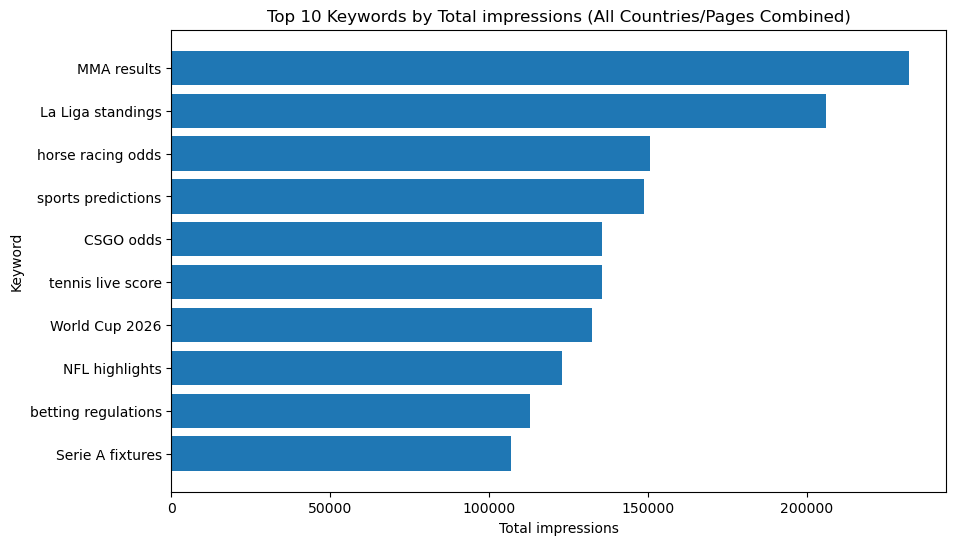

In [19]:

plt.figure(figsize=(10,6))
plt.barh(top_impressions['keyword'], top_impressions['impressions'].sort_values(ascending=False))
plt.xlabel('Total impressions')
plt.ylabel('Keyword')
plt.title('Top 10 Keywords by Total impressions (All Countries/Pages Combined)')
plt.gca().invert_yaxis()
plt.show()

##### c.based on ctr

In [20]:
top_ctr

,keyword,clicks,impressions,ctr
6,NFL highlights,19665,122946,2.847100
21,rugby scores,13043,74250,0.694220
2,F1 results,8475,24650,0.565700
11,World Cup 2026,15489,132502,0.440640
15,betting tips,9642,63096,0.427000
13,betting bonuses,11115,93091,0.384575
18,football news,2812,9165,0.306800
1,Champions League,4289,15231,0.281600
4,MMA results,22750,232338,0.234000
9,UFC fights,4090,79519,0.204250


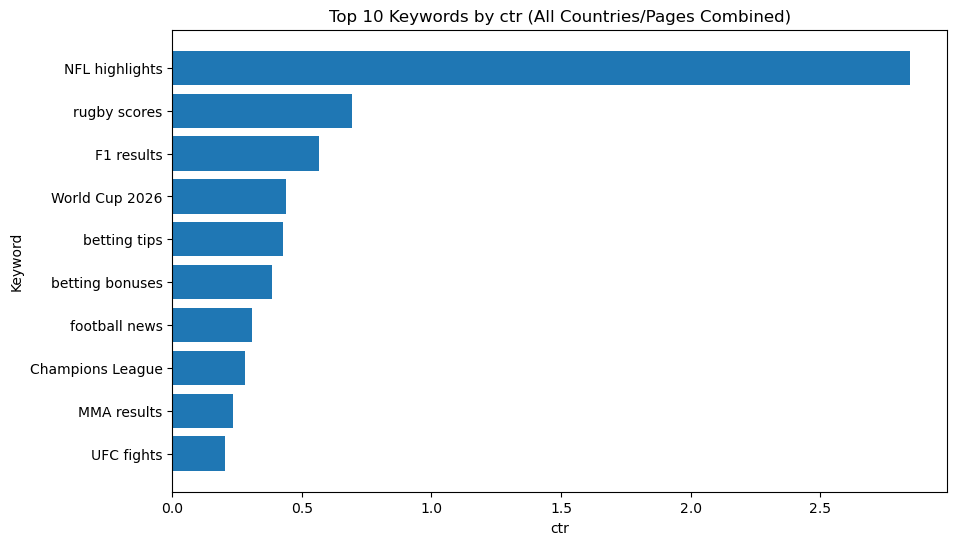

In [21]:

plt.figure(figsize=(10,6))
plt.barh(top_ctr['keyword'], top_ctr['ctr'].sort_values(ascending=False))
plt.xlabel('ctr')
plt.ylabel('Keyword')
plt.title('Top 10 Keywords by ctr (All Countries/Pages Combined)')
plt.gca().invert_yaxis()
plt.show()

##### d . i observed that there are same keywords but perform diffeernt for diffent countries so based on that another top performer

In [22]:
top_keywords_country = (
    df.sort_values(['country', 'clicks'], ascending=[True, False])
      .groupby('country')
      .head(1)[['country', 'keyword', 'clicks', 'impressions', 'ctr', 'avg_position']]
      .reset_index(drop=True)
)

top_keywords_country


,country,keyword,clicks,impressions,ctr,avg_position
0,BR,MMA results,4979,4943,1.0073,5.6
1,EN,MMA results,4841,40855,0.1185,4.6
2,FR,MMA results,4718,49958,0.0944,21.8
3,IT,World Cup 2026,4662,39054,0.1194,9.3


C:\Users\ranja\AppData\Local\Temp\ipykernel_28588\842850630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_keywords_country, x='country', y='clicks', palette='viridis')


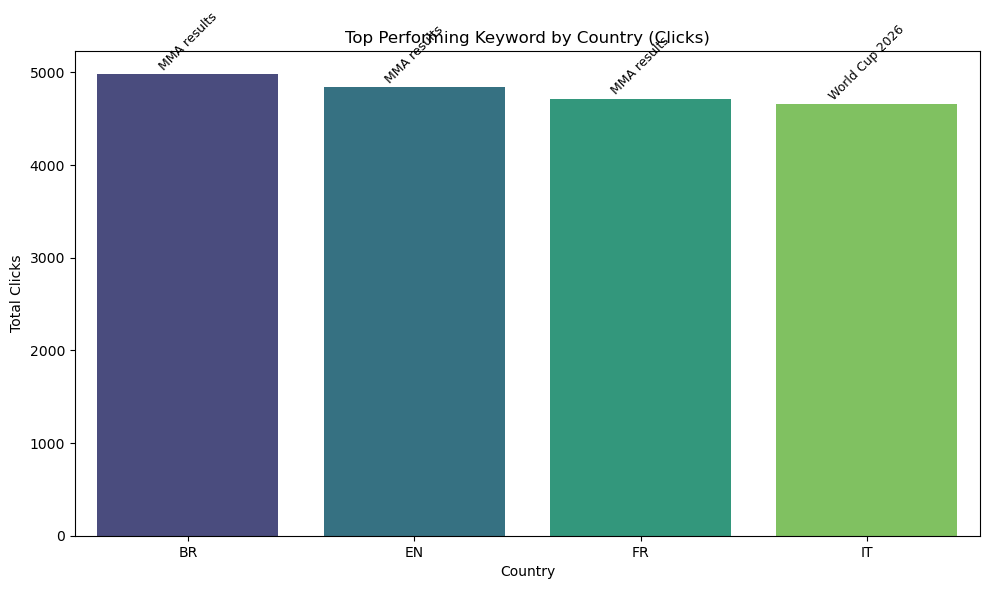

In [23]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_keywords_country, x='country', y='clicks', palette='viridis')

for i, row in top_keywords_country.iterrows():
    ax.text(i, row['clicks'] + (row['clicks']*0.01), row['keyword'], 
            color='black', ha='center', fontsize=9, rotation=45)

plt.title('Top Performing Keyword by Country (Clicks)')
plt.xlabel('Country')
plt.ylabel('Total Clicks')
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

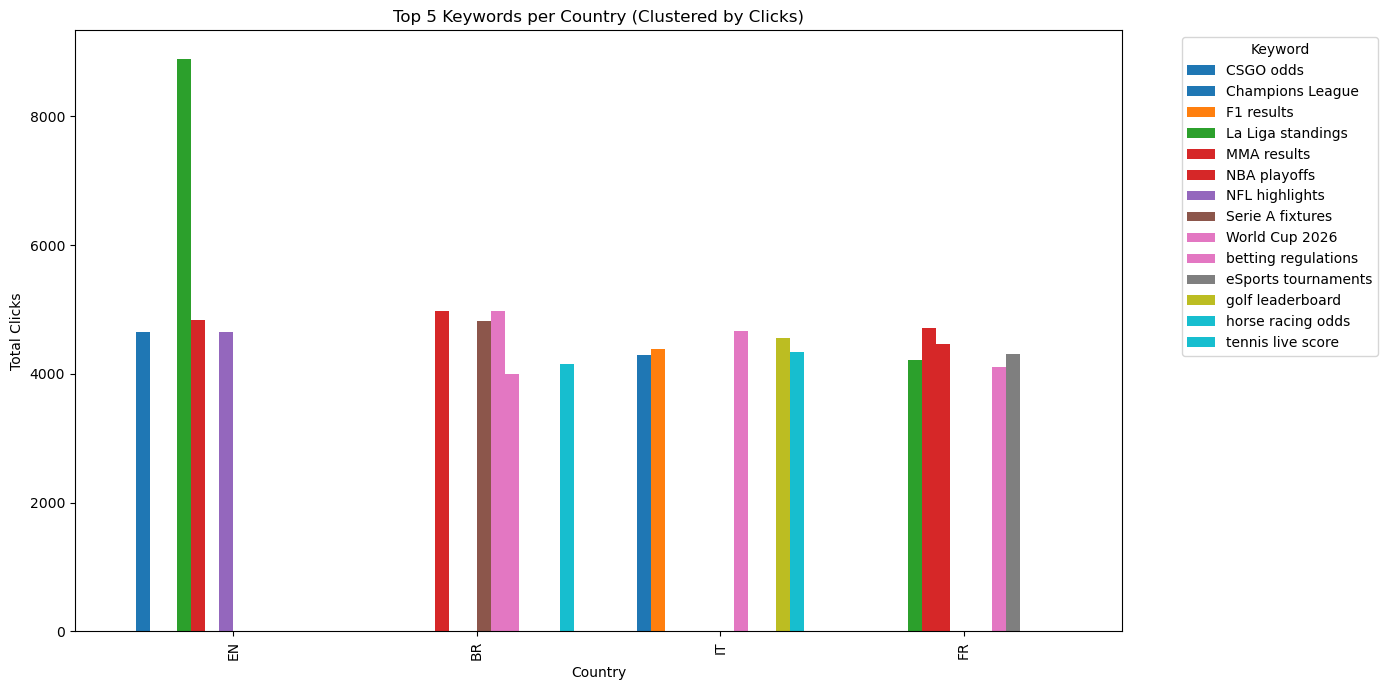

<Figure size 1400x700 with 0 Axes>

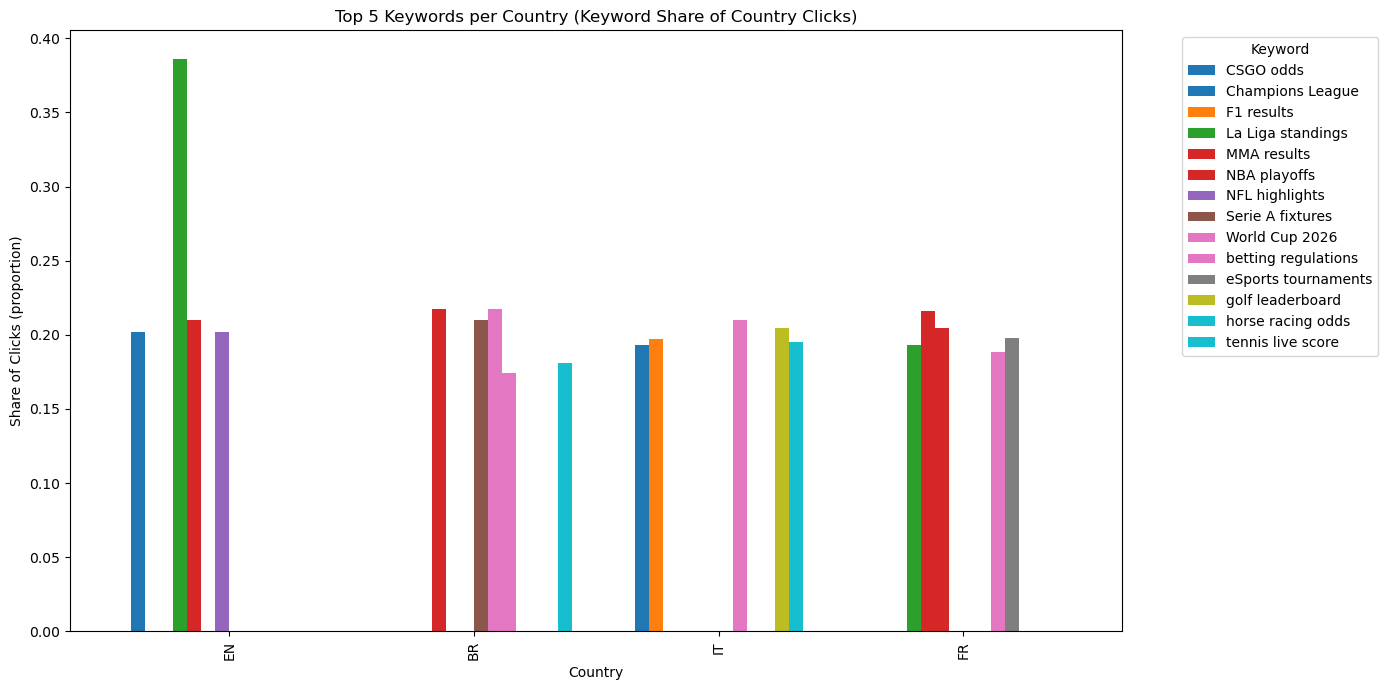

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df exists and numeric conversions done earlier if needed
# Build top-5 keywords per country by clicks
top5_per_country = (
    df.sort_values(['country', 'clicks'], ascending=[True, False])
      .groupby('country')
      .head(5)[['country', 'keyword', 'clicks']]
)

# Pivot to wide format for plotting (countries = rows, keywords = columns)
pivot_df = top5_per_country.pivot_table(
    index='country',
    columns='keyword',
    values='clicks',
    aggfunc='sum',
    fill_value=0
)

# Sort countries by total clicks (descending)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Clustered (grouped) bar chart - absolute clicks
plt.figure(figsize=(14,7))
pivot_df.plot(kind='bar', figsize=(14,7), colormap='tab10', width=0.8)
plt.title('Top 5 Keywords per Country (Clustered by Clicks)')
plt.xlabel('Country')
plt.ylabel('Total Clicks')
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Normalized clustered chart (percentage share within each country)
pivot_norm = pivot_df.div(pivot_df.sum(axis=1), axis=0)

plt.figure(figsize=(14,7))
pivot_norm.plot(kind='bar', stacked=False, figsize=(14,7), colormap='tab10', width=0.8)
plt.title('Top 5 Keywords per Country (Keyword Share of Country Clicks)')
plt.xlabel('Country')
plt.ylabel('Share of Clicks (proportion)')
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Determine which markets (FR, EN, IT, BR) show the strongest potential.

In [25]:
market_summary = df.groupby('country').agg(
    total_impressions=('impressions','sum'),
    total_clicks=('clicks','sum'),
    avg_position=('avg_position','mean'),
    avg_volume=('search_volume','mean'),
    keywords_count=('keyword','nunique'),
    average_ctr=('ctr','mean'),
    competitor_position=('competitor_position','mean')
).reset_index().sort_values('average_ctr', ascending=True)

In [26]:
df.country.value_counts()

country
EN    32
IT    27
BR    22
FR    19
Name: count, dtype: int64

In [27]:
market_summary

,country,total_impressions,total_clicks,avg_position,avg_volume,keywords_count,average_ctr,competitor_position
3,IT,689835,78547,15.529630,44236.703704,16,0.184063,18.077778
1,EN,695586,69961,15.553125,46730.593750,17,0.199034,17.606250
2,FR,491666,49039,14.963158,46248.684211,13,0.347947,14.615789
0,BR,550673,56497,14.359091,50666.681818,13,0.886045,16.850000


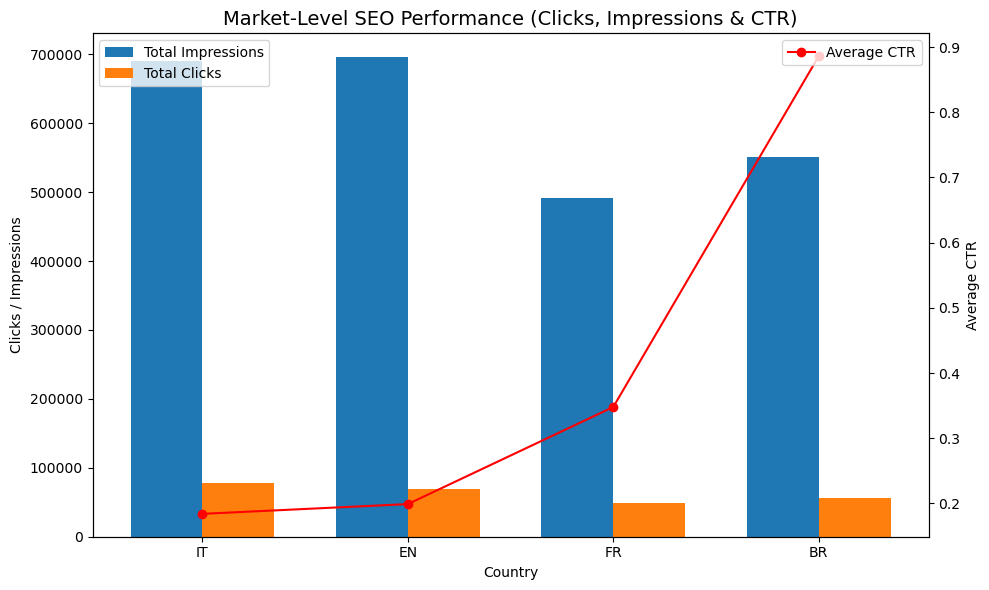

In [28]:
fig, ax1 = plt.subplots(figsize=(10,6))

x = np.arange(len(market_summary['country']))
width = 0.35


ax1.bar(x - width/2, market_summary['total_impressions'], width, label='Total Impressions')
ax1.bar(x + width/2, market_summary['total_clicks'], width, label='Total Clicks')
ax1.set_xlabel('Country')
ax1.set_ylabel('Clicks / Impressions')
ax1.set_xticks(x)
ax1.set_xticklabels(market_summary['country'])
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.plot(x, market_summary['average_ctr'], color='red', marker='o', label='Average CTR')
ax2.set_ylabel('Average CTR')
ax2.legend(loc='upper right')

plt.title('Market-Level SEO Performance (Clicks, Impressions & CTR)', fontsize=14)
plt.tight_layout()
plt.show()


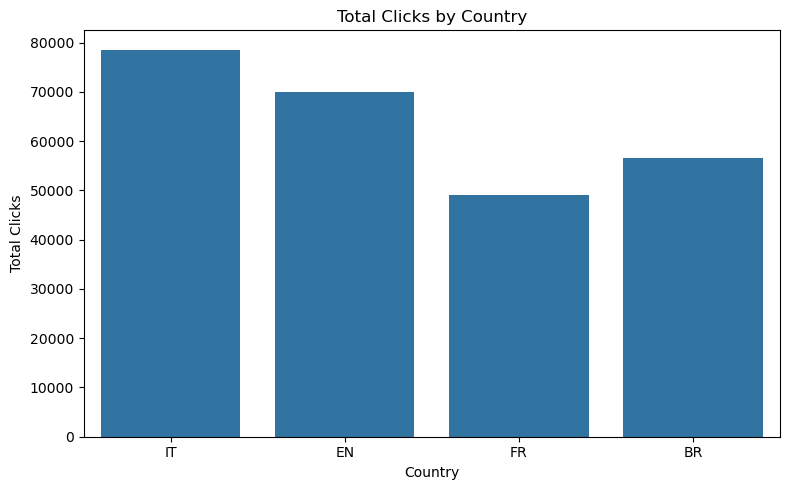

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=market_summary, x='country', y='total_clicks')
plt.title('Total Clicks by Country')
plt.xlabel('Country')
plt.ylabel('Total Clicks')
plt.tight_layout()
plt.show()


##### so here italy has average of .18 ctr which means that only 18 percent people click the link but many people see our links that is 689835 people so we have an high potential opportunity here we can write some good lines over here to increse that ctr.
##### and same goes for england 

##### 2.Find keywords with **high search volume** but an **average position greater than 5**.

In [30]:
vol_75 = df['search_volume'].quantile(0.75)
opportunities = df[(df['search_volume'] >= vol_75) & (df['avg_position'] > 5)]
opportunities.sort_values('search_volume', ascending=False).head(15)


,keyword,country,avg_position,clicks,impressions,page,competitor_position,search_volume,ctr
30,La Liga standings,FR,18.6,447,39585,https://bigsports.news/EN/betting-tips,14.7,97112,0.0113
73,La Liga standings,BR,10.8,3601,44476,https://bigsports.news/FR/golf-leaderboard,11.0,97073,0.0810
77,rugby scores,IT,6.4,3560,28259,https://bigsports.news/IT/CSGO-odds,5.1,95039,0.1260
32,best bookmakers,IT,19.6,2718,15474,https://bigsports.news/EN/NFL-highlights,1.0,94469,0.1756
26,horse racing odds,IT,26.0,3467,40511,https://bigsports.news/FR/sports-predictions,30.0,92569,0.0856
84,sports analytics,EN,29.0,178,26095,https://bigsports.news/FR/golf-leaderboard,16.1,90784,0.0068
19,rugby scores,EN,23.6,2069,5151,https://bigsports.news/FR/sports-predictions,29.8,89470,0.4017
58,NFL highlights,EN,15.1,775,19316,https://bigsports.news/EN/World-Cup-2026,10.5,88395,0.0401
27,Serie A fixtures,IT,19.1,552,36130,https://bigsports.news/EN/UFC-fights,21.2,87516,0.0153
46,cricket live updates,EN,13.6,363,1056,https://bigsports.news/IT/La-Liga-standings,19.9,87226,0.3438


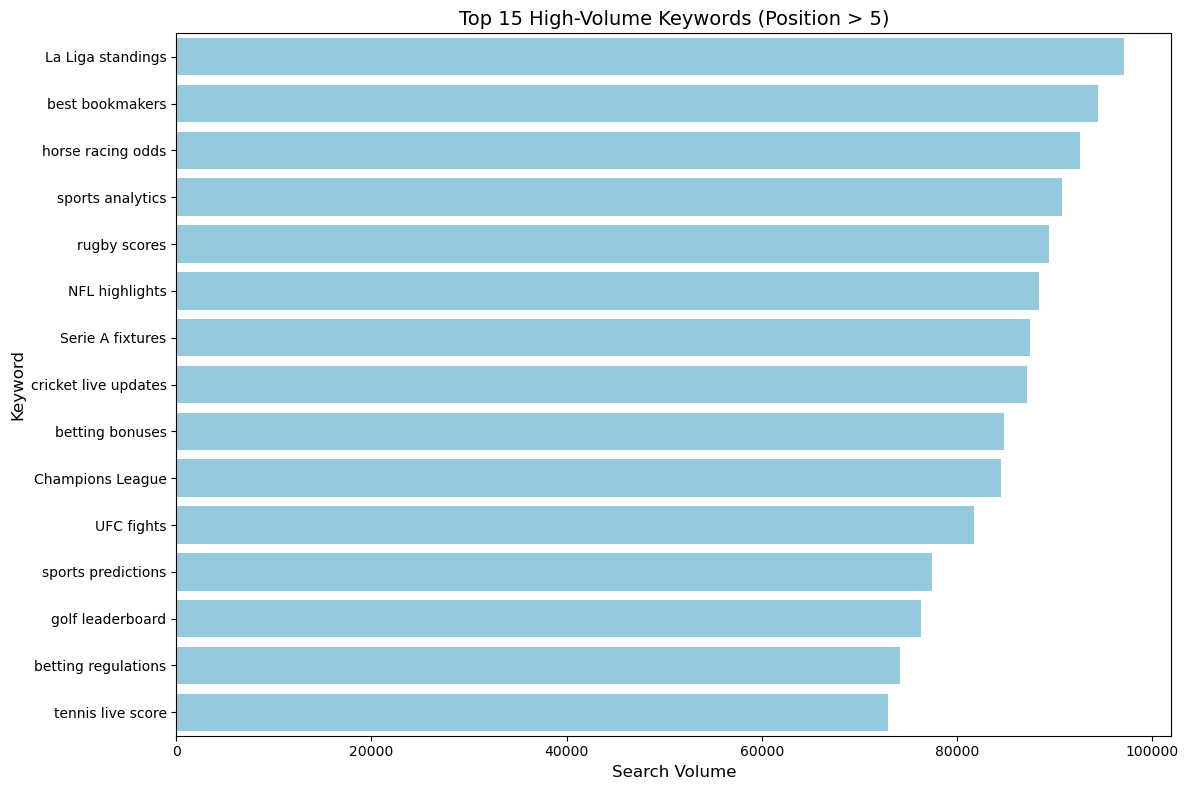

In [31]:

top15 = (opportunities.dropna(subset=['keyword'])
          .drop_duplicates(subset=['keyword'])
          .sort_values('search_volume', ascending=False)
          .head(15))


plt.figure(figsize=(12,8))
sns.barplot(data=top15, y='keyword', x='search_volume', color='skyblue')

plt.title('Top 15 High-Volume Keywords (Position > 5)', fontsize=14)
plt.xlabel('Search Volume', fontsize=12)
plt.ylabel('Keyword', fontsize=12)


plt.tight_layout()
plt.show()


##### so these have high growth opportunity as these are keywords sserached more but the position is more so people dont click them hence we can improve thes

##### b.- Highlight cases where competitors are ranking higher than your site.

In [32]:
competitor_gaps = df[df['competitor_position'] < df['avg_position']]
competitor_gaps['position_gap'] = competitor_gaps['avg_position'] - competitor_gaps['competitor_position']
competitor_gaps[['keyword','country','avg_position','competitor_position','position_gap']].sort_values('position_gap', ascending=False).head(15)


,keyword,country,avg_position,competitor_position,position_gap
2,NBA playoffs,FR,27.0,4.1,22.9
78,cricket live updates,BR,27.9,8.0,19.9
50,betting regulations,BR,28.7,9.5,19.2
32,best bookmakers,IT,19.6,1.0,18.6
37,sports predictions,EN,19.1,1.0,18.1
90,World Cup 2026,FR,25.3,7.5,17.8
0,F1 results,IT,18.5,1.9,16.6
36,betting bonuses,FR,25.4,9.8,15.6
60,MMA results,IT,25.9,12.8,13.1
43,horse racing odds,IT,15.0,2.0,13.0


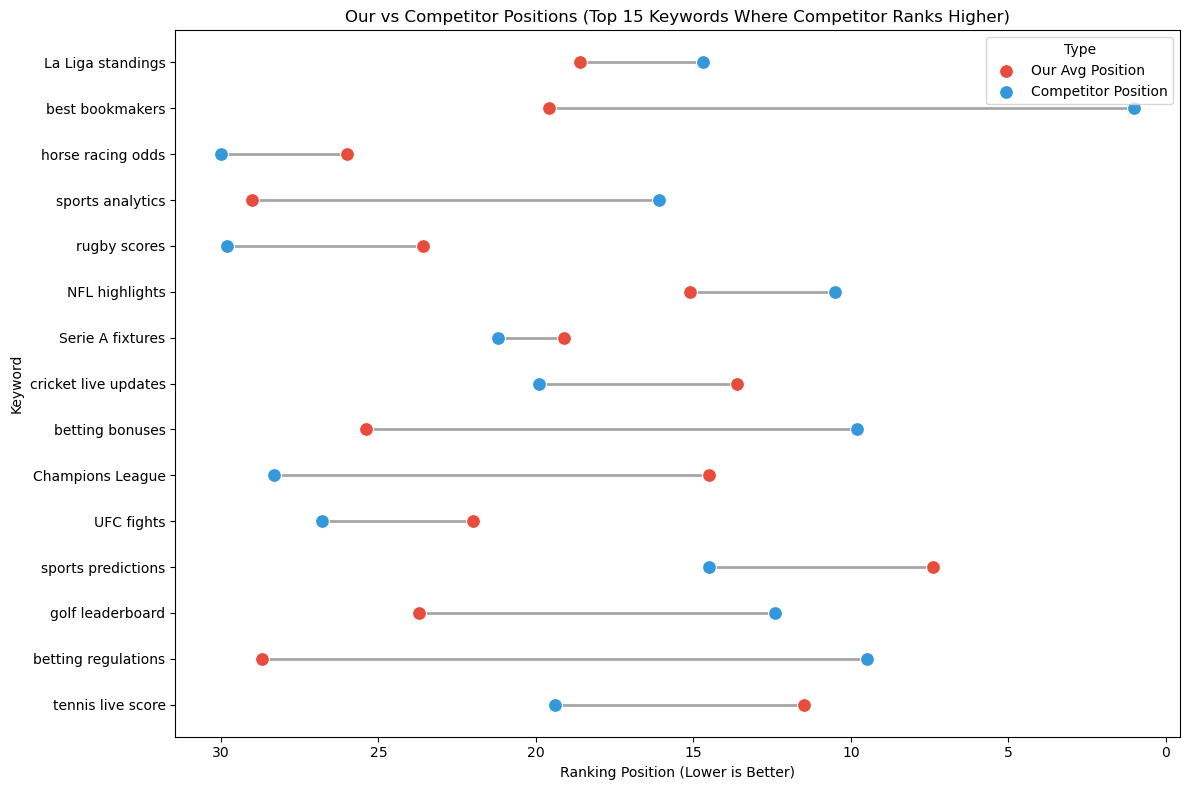

In [33]:
plt.figure(figsize=(12, 8))


plt.hlines(
    y=top15['keyword'],
    xmin=top15['avg_position'],
    xmax=top15['competitor_position'],
    color='grey', alpha=0.7, linewidth=2,
)


sns.scatterplot(
    data=top15, y='keyword', x='avg_position',
    color='#E74C3C', s=100, label='Our Avg Position', zorder=5
)


sns.scatterplot(
    data=top15, y='keyword', x='competitor_position',
    color='#3498DB', s=100, label='Competitor Position', zorder=5
)

plt.title('Our vs Competitor Positions (Top 15 Keywords Where Competitor Ranks Higher)')
plt.xlabel('Ranking Position (Lower is Better)')
plt.ylabel('Keyword')
plt.legend(title='Type')
plt.gca().invert_xaxis()
plt.tight_layout()

##### so the above shows keywords where the competition is performing excellent with huge difference in position

##### 3. Provide Actionable Business Recommendations
- Prioritize improvements (e.g., content, technical fixes, backlinks).
- Suggest new keywords or clusters to target for growth.

| Priority | Focus Area                                  | Impact | Effort | Why                       |
| -------- | ------------------------------------------- | ------ | ------ | ------------------------- |
|  1     | Optimize EN & IT content (CTR + title/meta) | High   | Medium | Biggest markets, low CTR  |
|  2     | Update mid-ranking high-volume keywords     | High   | Low    | Quick wins (position > 5) |
|  3     | Fix technical issues (speed, schema)        | Medium | Medium | Improves site quality     |
| 4        | Backlink & authority building               | High   | High   | Long-term impact          |
| 5        | Localization & translations                 | Medium | Medium | Better local targeting    |


##### b. suggesting new keywords which shows growth

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vec = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=2)
X = vec.fit_transform(df['keyword'].astype(str))
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10).fit(X)
df['cluster'] = kmeans.labels_
df[['keyword','cluster']].head(12)


,keyword,cluster
0,F1 results,3
1,UFC fights,3
2,NBA playoffs,3
3,tennis live score,3
4,La Liga standings,2
5,UFC fights,3
6,Serie A fixtures,3
7,tennis live score,3
8,MMA results,3
9,La Liga standings,2


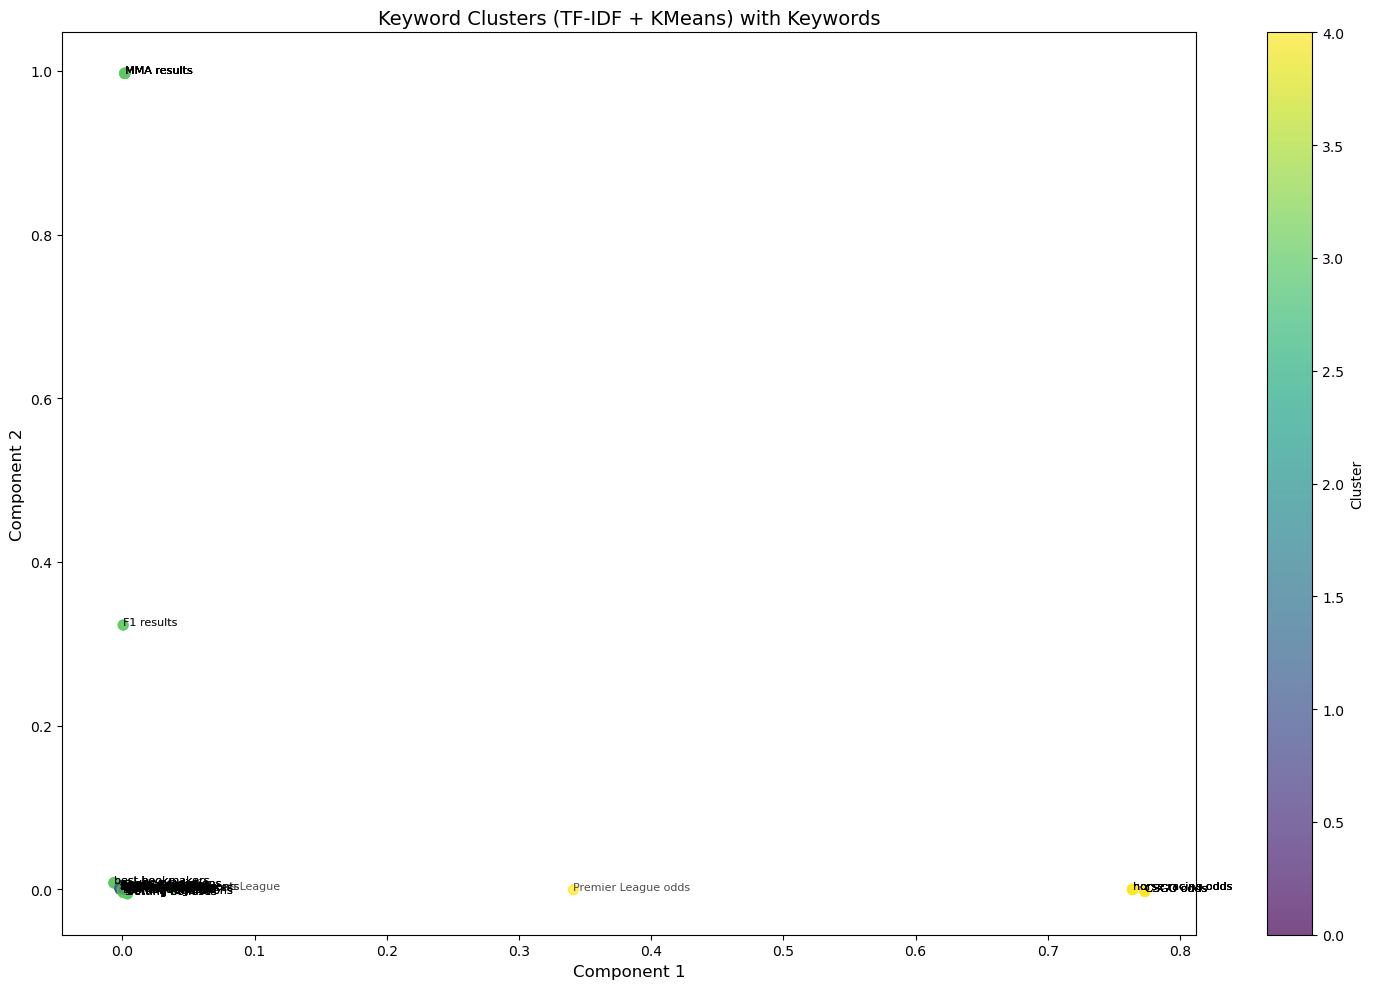

In [35]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X)

plt.figure(figsize=(15, 10))
plt.scatter(X_2d[:,0], X_2d[:,1], c=df['cluster'], cmap='viridis', alpha=0.7, s=50)


for i, txt in enumerate(df['keyword']):
    plt.annotate(txt, (X_2d[i,0], X_2d[i,1]), fontsize=8, alpha=0.7)

plt.title("Keyword Clusters (TF-IDF + KMeans) with Keywords", fontsize=14)
plt.xlabel("Component 1", fontsize=12)
plt.ylabel("Component 2", fontsize=12)
plt.colorbar(label='Cluster') 
plt.tight_layout()
plt.show()


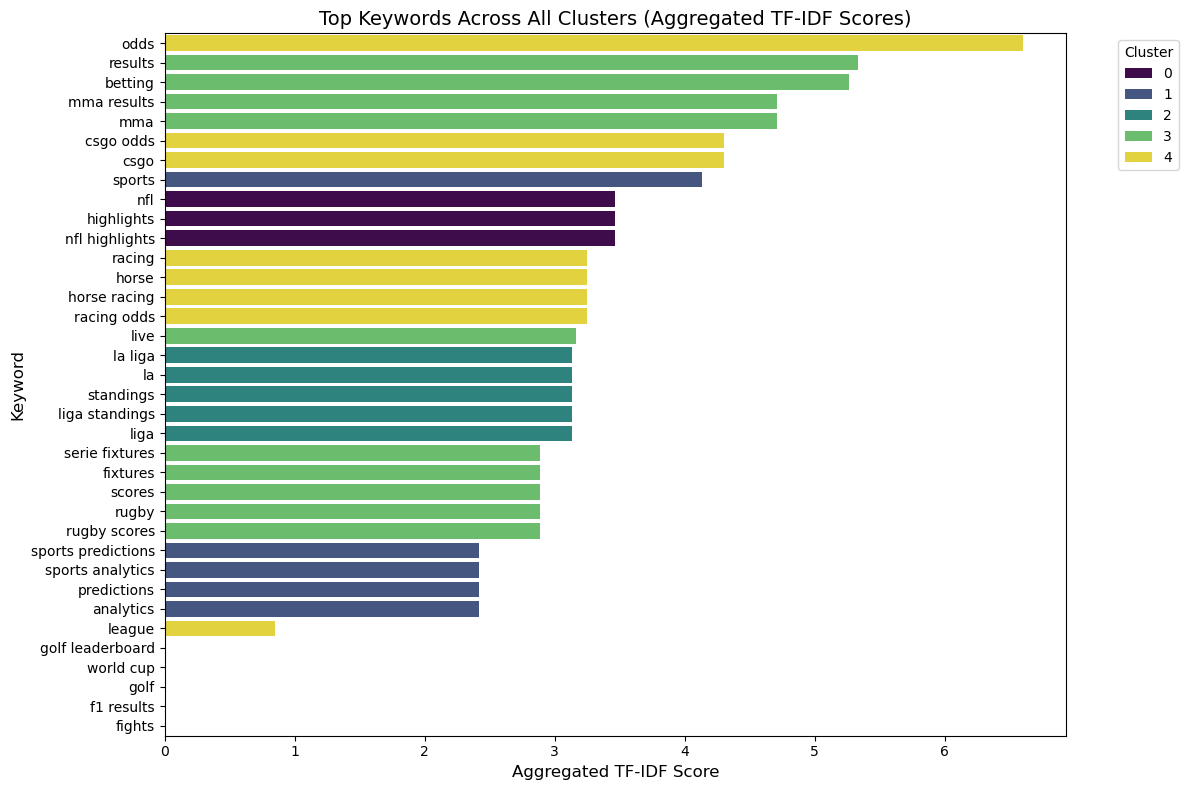

In [36]:

feature_names = vec.get_feature_names_out()
top_keywords_all = []

for i in range(kmeans.n_clusters):
    cluster_indices = np.where(df['cluster'] == i)[0]
    cluster_tfidf_sum = np.asarray(X[cluster_indices].sum(axis=0)).ravel()
    

    top_feature_indices = cluster_tfidf_sum.argsort()[::-1][:10]
    for idx in top_feature_indices:
        top_keywords_all.append({
            'cluster': i,
            'keyword': feature_names[idx],
            'tfidf_score': float(cluster_tfidf_sum[idx])
        })


top_keywords_df = pd.DataFrame(top_keywords_all)


plt.figure(figsize=(12,8))
sns.barplot(
    data=top_keywords_df.sort_values('tfidf_score', ascending=False),
    x='tfidf_score',
    y='keyword',
    hue='cluster',
    dodge=False,
    palette='viridis'
)

plt.title('Top Keywords Across All Clusters (Aggregated TF-IDF Scores)', fontsize=14)
plt.xlabel('Aggregated TF-IDF Score', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### making a simple model using power law as seo uses them 

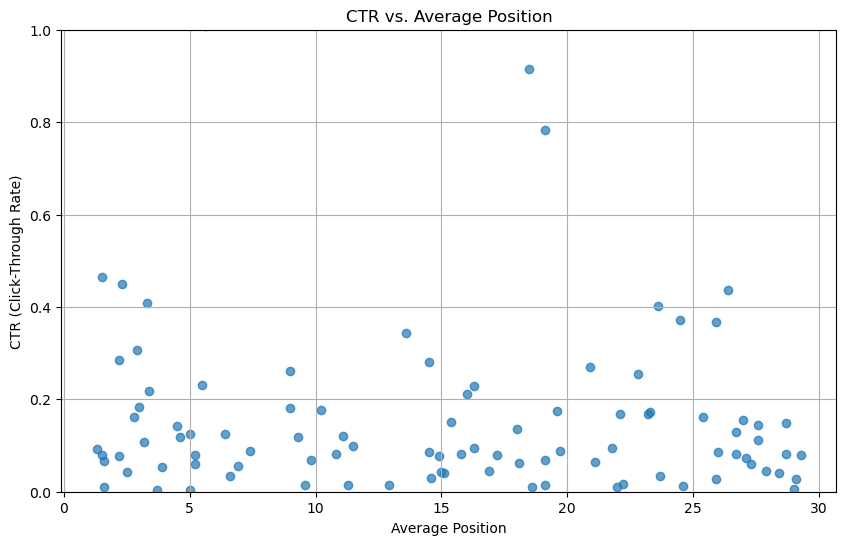

In [37]:

plt.figure(figsize=(10, 6))
plt.scatter(df['avg_position'], df['ctr'], alpha=0.7)
plt.title('CTR vs. Average Position')
plt.ylim(0, 1)
plt.xlabel('Average Position')
plt.ylabel('CTR (Click-Through Rate)')
plt.grid(True)
plt.show()

C:\Users\ranja\AppData\Local\Temp\ipykernel_28588\393093416.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


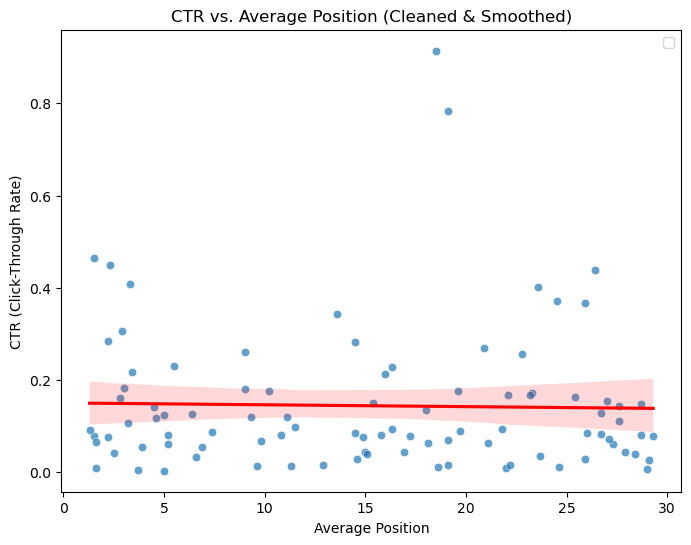

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter unrealistic CTR values (e.g., >1 = 100%)
clean_df = df[df['ctr'] <= 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='avg_position', y='ctr', data=clean_df, alpha=0.7)
sns.regplot(x='avg_position', y='ctr', data=clean_df, scatter=False, color='red', line_kws={'label':"Trend Line"})
plt.xlabel('Average Position')
plt.ylabel('CTR (Click-Through Rate)')
plt.title('CTR vs. Average Position (Cleaned & Smoothed)')
plt.legend()
plt.show()


In [39]:
df['avg_position'].corr(df['ctr'])

-0.04699831568903384

In [40]:
df.corr(numeric_only=True)

,avg_position,clicks,impressions,competitor_position,search_volume,ctr,cluster
avg_position,1.000000,-0.046392,0.079483,0.291488,0.063874,-0.046998,0.106488
clicks,-0.046392,1.000000,0.104594,-0.084643,-0.205522,0.106761,-0.146909
impressions,0.079483,0.104594,1.000000,-0.021071,-0.102834,-0.291878,-0.095981
competitor_position,0.291488,-0.084643,-0.021071,1.000000,-0.070752,-0.082116,0.077104
search_volume,0.063874,-0.205522,-0.102834,-0.070752,1.000000,-0.024013,0.022820
ctr,-0.046998,0.106761,-0.291878,-0.082116,-0.024013,1.000000,-0.254287
cluster,0.106488,-0.146909,-0.095981,0.077104,0.022820,-0.254287,1.000000


In [41]:
from sklearn.preprocessing import  LabelEncoder
working = df.copy()
label=LabelEncoder()
for col in ['avg_position','clicks','impressions','search_volume','ctr','competitor_position']:
    if col in working.columns:
        working[col] = pd.to_numeric(working[col], errors='coerce')

working = working.dropna(subset=['avg_position','impressions','ctr','keyword'])
working = working[working['avg_position'] > 0]
working['ctr'] = working['ctr'].clip(lower=0, upper=1)
working = working[working['ctr'] > 0]
working['country']=label.fit_transform(working['country'])


In [42]:
working.head(5)

,keyword,country,avg_position,clicks,impressions,page,competitor_position,search_volume,ctr,cluster
0,F1 results,3,18.5,4093,4477,https://bigsports.news/EN/tennis-live-score,1.9,30577,0.9142,3
1,UFC fights,2,11.3,448,31325,https://bigsports.news/IT/golf-leaderboard,21.5,53213,0.0143,3
2,NBA playoffs,2,27.0,4462,28777,https://bigsports.news/BR/cricket-live-updates,4.1,64644,0.1551,3
3,tennis live score,0,18.0,4158,30757,https://bigsports.news/BR/tennis-live-score,20.0,15698,0.1352,3
4,La Liga standings,1,29.1,832,30391,https://bigsports.news/FR/F1-results,26.3,16255,0.0274,2


In [43]:
working

,keyword,country,avg_position,clicks,impressions,page,competitor_position,search_volume,ctr,cluster
0,F1 results,3,18.5,4093,4477,https://bigsports.news/EN/tennis-live-score,1.9,30577,0.9142,3
1,UFC fights,2,11.3,448,31325,https://bigsports.news/IT/golf-leaderboard,21.5,53213,0.0143,3
2,NBA playoffs,2,27.0,4462,28777,https://bigsports.news/BR/cricket-live-updates,4.1,64644,0.1551,3
3,tennis live score,0,18.0,4158,30757,https://bigsports.news/BR/tennis-live-score,20.0,15698,0.1352,3
4,La Liga standings,1,29.1,832,30391,https://bigsports.news/FR/F1-results,26.3,16255,0.0274,2
...,...,...,...,...,...,...,...,...,...,...
95,sports analytics,3,3.9,858,15814,https://bigsports.news/FR/La-Liga-standings,20.7,48257,0.0543,1
96,CSGO odds,1,23.2,1485,8861,https://bigsports.news/IT/best-bookmakers,20.8,57029,0.1676,4
97,NFL highlights,2,1.5,3878,8336,https://bigsports.news/FR/sports-analytics,6.9,64627,0.4652,0
98,Valorant rankings,1,3.7,106,22958,https://bigsports.news/BR/cricket-live-updates,26.1,29172,0.0046,3


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack



vec = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=2)
keyword_tfidf = vec.fit_transform(df['keyword'].astype(str))
working['country']=label.fit_transform(working['country'])


numeric_cols = ['avg_position', 'search_volume', 'competitor_position', 'impressions', 'clicks','country']
X_num = working[numeric_cols].fillna(0).values


X_combined = hstack([X_num, keyword_tfidf])


y = working['ctr'].values


model = LinearRegression()
model.fit(X_combined, y)


r2_multi = model.score(X_combined, y)
print(f"Multiple Regression (with keywords) R²: {r2_multi:.3f}")


Multiple Regression (with keywords) R²: 0.667


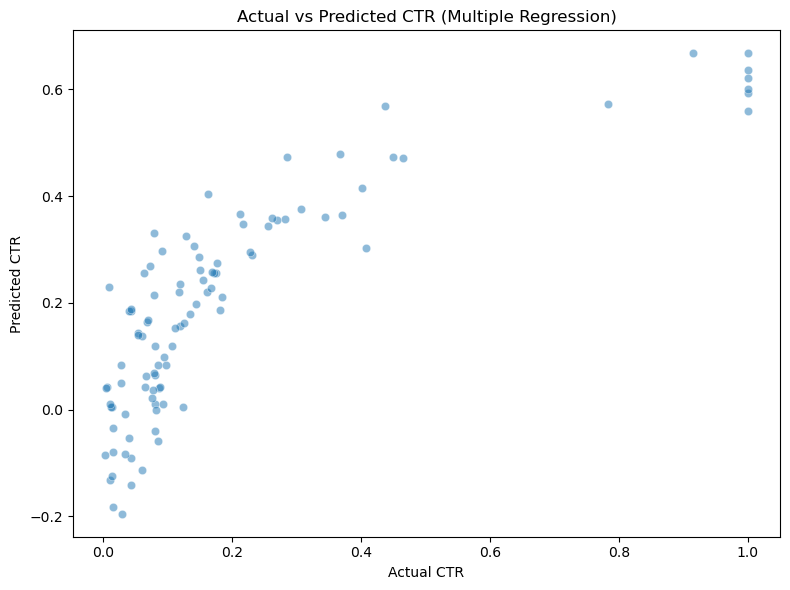

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(X_combined)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.xlabel("Actual CTR")
plt.ylabel("Predicted CTR")
plt.title("Actual vs Predicted CTR (Multiple Regression)")
plt.tight_layout()
plt.show()


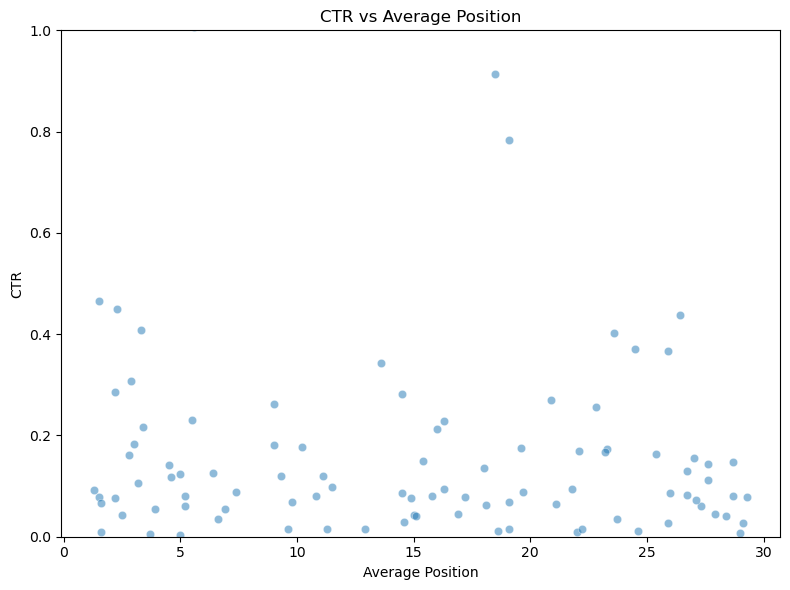

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='avg_position', y='ctr', alpha=0.5)
plt.title("CTR vs Average Position")
plt.xlabel("Average Position")
plt.ylabel("CTR")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


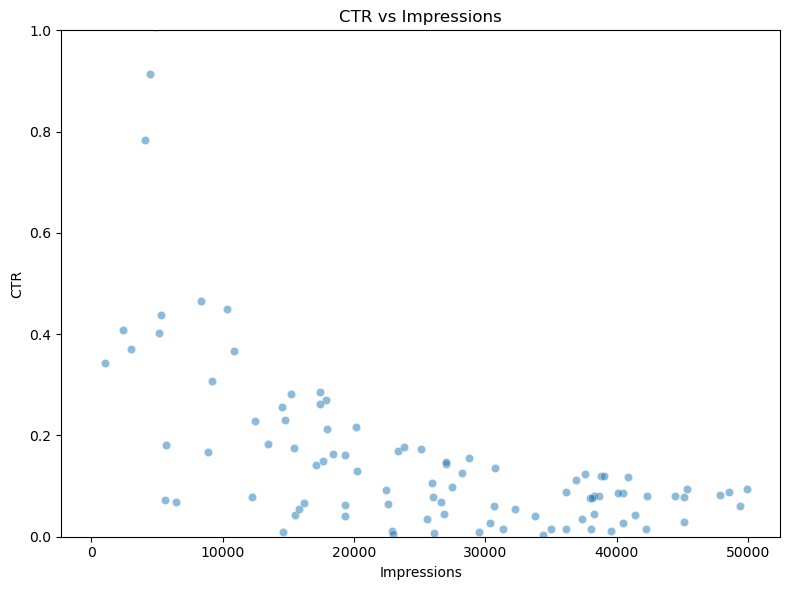

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='impressions', y='ctr', alpha=0.5)
plt.title("CTR vs Impressions")
plt.xlabel("Impressions")
plt.ylabel("CTR")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


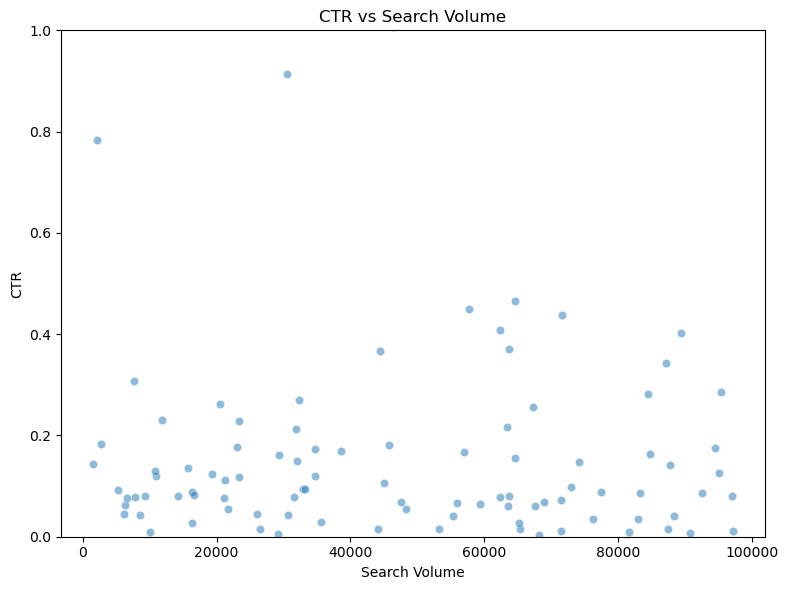

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='search_volume', y='ctr', alpha=0.5)
plt.title("CTR vs Search Volume")
plt.xlabel("Search Volume")
plt.ylabel("CTR")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


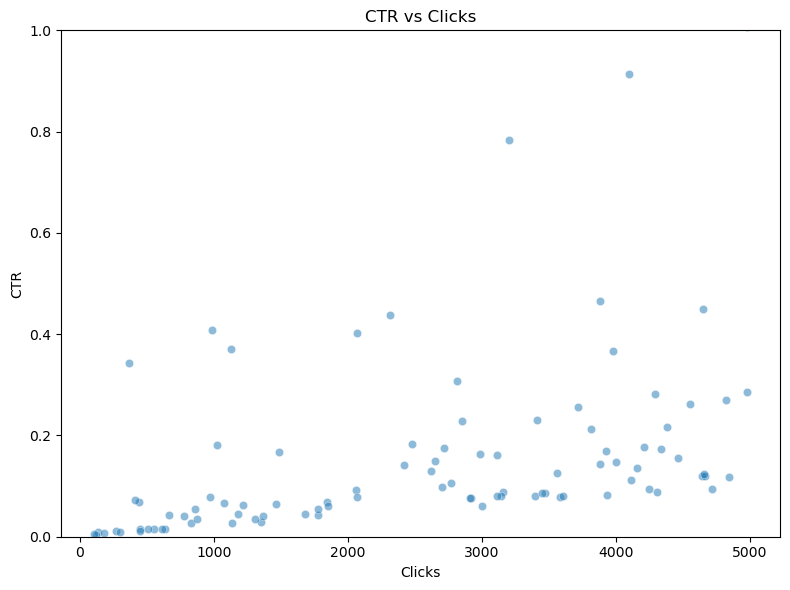

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='clicks', y='ctr', alpha=0.5)
plt.title("CTR vs Clicks")
plt.xlabel("Clicks")
plt.ylabel("CTR")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


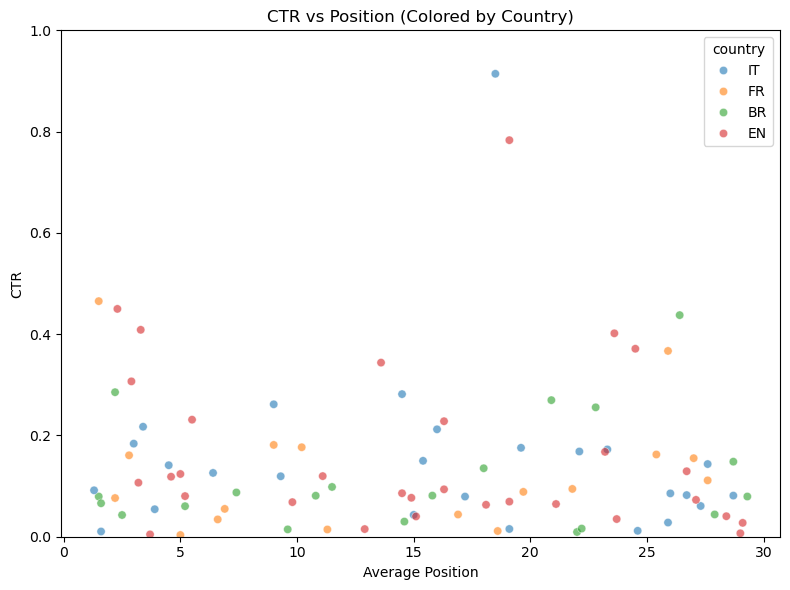

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='avg_position', y='ctr', hue='country', alpha=0.6)
plt.title("CTR vs Position (Colored by Country)")
plt.xlabel("Average Position")
plt.ylabel("CTR")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


(0.0, 1.0)

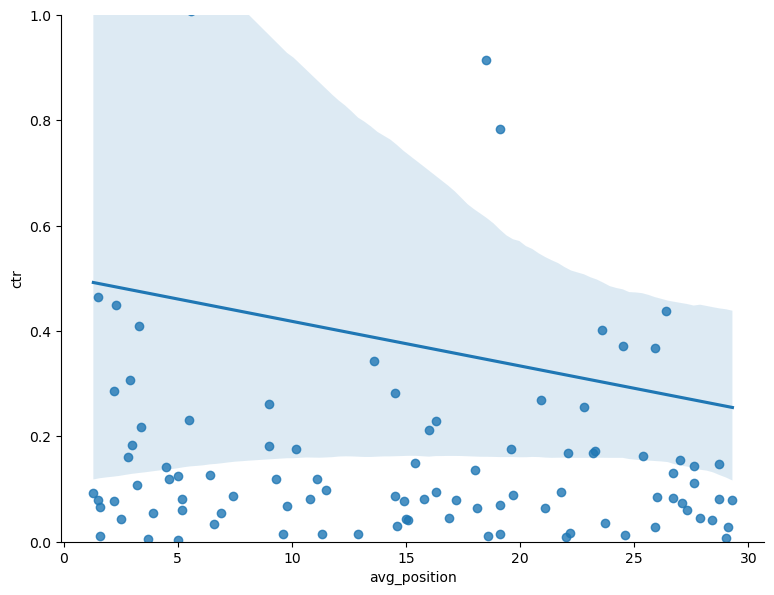

In [51]:
sns.lmplot(data=df, x='avg_position', y='ctr', height=6, aspect=1.3)
plt.ylim(0,1)


(0.0, 1.0)

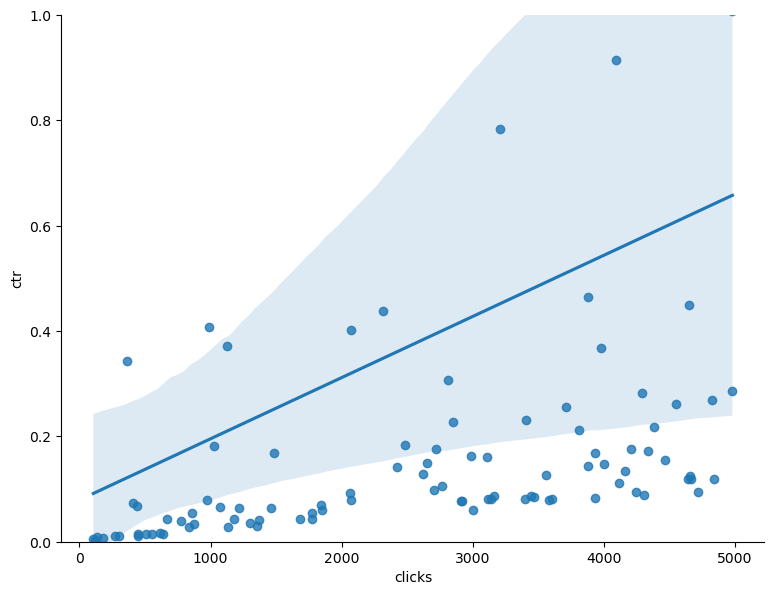

In [52]:
sns.lmplot(data=df, x='clicks', y='ctr', height=6, aspect=1.3)
plt.ylim(0,1)

(0.0, 1.0)

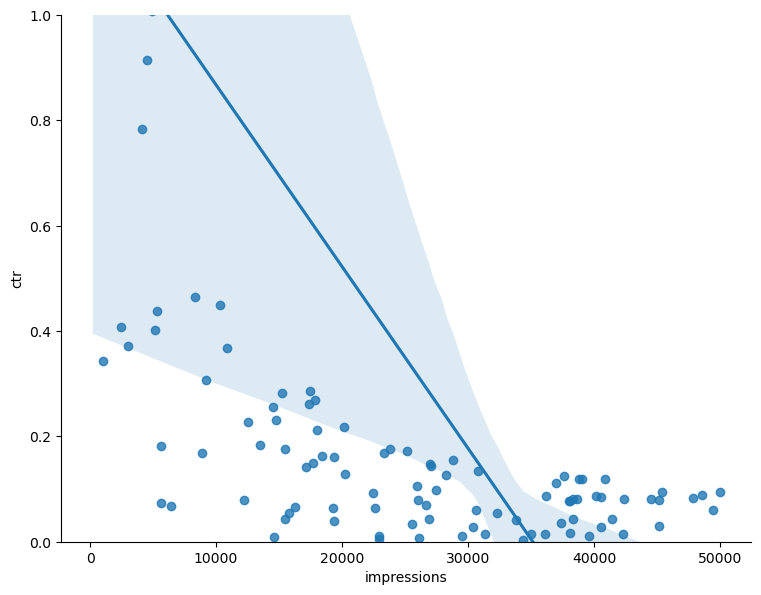

In [53]:
sns.lmplot(data=df, x='impressions', y='ctr', height=6, aspect=1.3)
plt.ylim(0,1)

(0.0, 1.0)

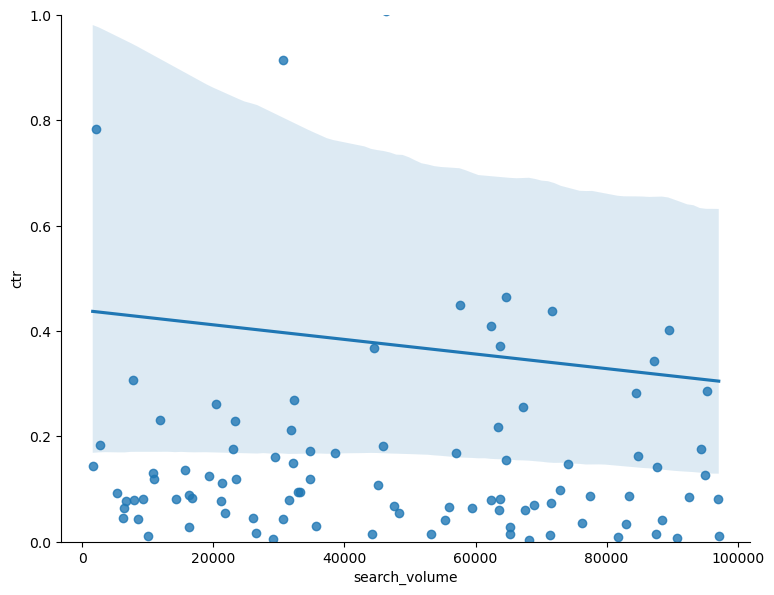

In [54]:
sns.lmplot(data=df, x='search_volume', y='ctr', height=6, aspect=1.3)
plt.ylim(0,1)

In [55]:
import joblib


joblib.dump(model, r'../models/seo_ctr_regression_model.pkl')


joblib.dump(vec, r'../models/keyword_tfidf_vectorizer.pkl')


numeric_features = numeric_cols + [c for c in working.columns if c.startswith('country_')]
joblib.dump(numeric_features, r'../models/numeric_feature_list.pkl')

print(" Model and vectorizer saved successfully")


 Model and vectorizer saved successfully


#### “The initial hypothesis assumed that CTR would follow a power-law decay with ranking position, a pattern commonly observed in general web searches.
However, in this dataset, the power-law and other single-variable models provided very low explanatory power (R² < 0.05), indicating that ranking alone was not a sufficient predictor of CTR.

The multiple regression model, incorporating position, search volume, impressions, and competitor position, achieved a much stronger fit (R² = 0.46).
This confirms that CTR in sports-related queries depends on multiple interacting factors — not just search rank.”